# Model 4 - Pinchout

Forcing GemPy to create a layer of varying thickness. We start by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

Creating the model by importing the input data and displaying it:

In [2]:
path_to_data = os.pardir+"/data/input_data/jan_models/"

geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[50,50,50], 
                        path_o = path_to_data + "model4_orientations.csv",
                        path_i = path_to_data + "model4_surface_points.csv") 

Active grids: ['regular']


In [3]:
geo_data.get_data()

X    Y    Z     X_r     Y_r     Z_r surface  \
surface_points 0      0  200  300  0.2501  0.3501  0.4001   rock1   
               1      0  800  300  0.2501  0.6501  0.4001   rock1   
               2    500  200  375  0.5001  0.3501  0.4376   rock1   
               3    500  800  375  0.5001  0.6501  0.4376   rock1   
               4   1000  200  450  0.7501  0.3501  0.4751   rock1   
               5   1000  800  450  0.7501  0.6501  0.4751   rock1   
               6      0  200  700  0.2501  0.3501  0.6001   rock2   
               7      0  800  700  0.2501  0.6501  0.6001   rock2   
               8    500  200  625  0.5001  0.3501  0.5626   rock2   
               9    500  800  625  0.5001  0.6501  0.5626   rock2   
               10  1000  200  550  0.7501  0.3501  0.5251   rock2   
               11  1000  800  550  0.7501  0.6501  0.5251   rock2   
orientations   3    500  500  375  0.5001  0.5001  0.4376   rock1   
               4    500  200  375  0.5001  0.3501  0.4376   rock1   
               5    500  800  375  0.5001  0.6501  0.4376   rock1   
               0    500  500  625  0.5001  0.5001  0.5626   rock2   
               1    500  200  625  0.5001  0.3501  0.5626   rock2   
               2    500  800  625  0.5001  0.6501  0.5626   rock2   

                           series  id  order_series        smooth     G_x  \
surface_points 0   Default series   1             1  1.000000e-08     NaN   
               1   Default series   1             1  1.000000e-08     NaN   
               2   Default series   1             1  1.000000e-08     NaN   
               3   Default series   1             1  1.000000e-08     NaN   
               4   Default series   1             1  1.000000e-08     NaN   
               5   Default series   1             1  1.000000e-08     NaN   
               6   Default series   2             1  1.000000e-08     NaN   
               7   Default series   2             1  1.000000e-08     NaN   
               8   Default series   2             1  1.000000e-08     NaN   
               9   Default series   2             1  1.000000e-08     NaN   
               10  Default series   2             1  1.000000e-08     NaN   
               11  Default series   2             1  1.000000e-08     NaN   
orientations   3   Default series   1             1  1.000000e-02 -0.1485   
               4   Default series   1             1  1.000000e-02 -0.1485   
               5   Default series   1             1  1.000000e-02 -0.1485   
               0   Default series   2             1  1.000000e-02  0.1485   
               1   Default series   2             1  1.000000e-02  0.1485   
               2   Default series   2             1  1.000000e-02  0.1485   

                            G_y       G_z     dip  azimuth  polarity  
surface_points 0            NaN       NaN     NaN      NaN       NaN  
               1            NaN       NaN     NaN      NaN       NaN  
               2            NaN       NaN     NaN      NaN       NaN  
               3            NaN       NaN     NaN      NaN       NaN  
               4            NaN       NaN     NaN      NaN       NaN  
               5            NaN       NaN     NaN      NaN       NaN  
               6            NaN       NaN     NaN      NaN       NaN  
               7            NaN       NaN     NaN      NaN       NaN  
               8            NaN       NaN     NaN      NaN       NaN  
               9            NaN       NaN     NaN      NaN       NaN  
               10           NaN       NaN     NaN      NaN       NaN  
               11           NaN       NaN     NaN      NaN       NaN  
orientations   3   9.999909e-13  0.988912  351.46     90.0       1.0  
               4   9.999909e-13  0.988912  351.46     90.0       1.0  
               5   9.999909e-13  0.988912  351.46     90.0       1.0  
               0   1.000009e-12  0.988912    8.54     90.0       1.0  
               1   1.000009e-12  0.9889

Setting and ordering the units and series:

In [4]:
gp.map_series_to_surfaces(geo_data, {"Strat_Series": ('rock2','rock1'),"Basement_Series":('basement')})

,surface,series,order_surfaces,isBasement,color,id
0,rock1,Strat_Series,1,False,#015482,1
1,rock2,Strat_Series,2,False,#9f0052,2
2,basement,Basement_Series,1,True,#ffbe00,3


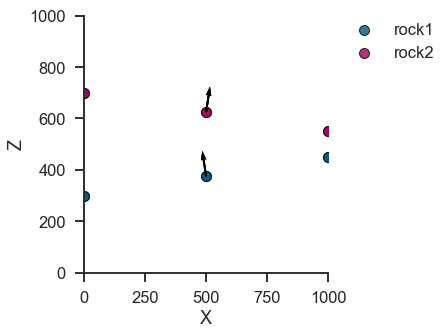

In [5]:
%matplotlib inline
gp.plot.plot_data(geo_data, direction='y')

Calculating the model:

In [6]:
interp_data = gp.set_interpolation_data(geo_data, theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!


In [7]:
sol = gp.compute_model(geo_data)

Displaying the result in x and y direction:

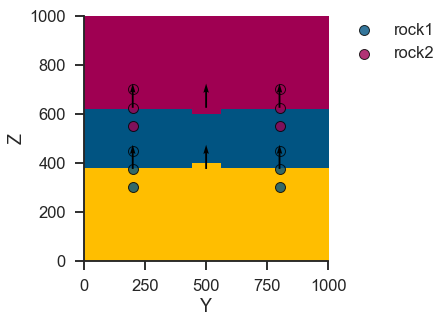

In [8]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                         direction='x', show_data=True)

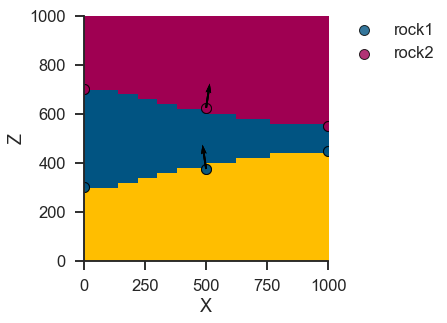

In [9]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                         direction='y', show_data=True)